# Customer Review Prediction

#### Project Overview
1. This project is for walking through the __limited__ data to found some insight from it.
2. Only 5 features, location_id and review_id are meaningless when building model.
3. Here the location can be regarded as place to provide services such as restaurant.

#### Data Set
1. __location_id__: id for a certain location which provide service
2. __review_id__: unique id for each review
3. __source__: where the review comes from
4. __date__: when the review given
5. __rating__: the rating of review is between 1 to 5 and 5 is the best.

#### This project has two parts.
1. Build a model to evaluate each location.
2. Predict the review for location.

## Content
<ul>
<li>[Part 1: Data Overview](#Part-1:-Data-Overview)
<li>[Part 2: Compare Review of Locations](#Part-2:-Compare-Review-of-Locations)
<li>[Part 3: Create a Formula to Rank All Locations](#Part-3:-Create-a-Formula-to-Rank-All-Locations)
<li>[Part 4: Build Predictive Model](#Part-4:-Build-Predictive-Model)
</ul>

# Part 1: Data Overview

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [41]:
df = pd.read_csv("reviews.csv")
df.head(5)

,location_id,review_id,source,date,rating
0,4962_221,test_1895327047,GOOGLE_PLACES,10/20/15,1.0
1,4962_221,test_18961550118,FACEBOOK,11/27/17,1.0
2,4962_221,test_2044312531,FACEBOOK,11/15/17,1.0
3,4962_221,test_21399832280,FACEBOOK,7/17/17,1.0
4,4962_221,test_21516225526,FACEBOOK,1/11/16,1.0


In [42]:
df.describe() ## Only evaluate numerical values.

,rating
count,179276.000000
mean,4.413959
std,1.273551
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [43]:
print "Num of rows: " + str(df.shape[0]) # row count
print "Num of columns: " + str(df.shape[1]) # col count

Num of rows: 179345
Num of columns: 5


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179345 entries, 0 to 179344
Data columns (total 5 columns):
location_id    179345 non-null object
review_id      179345 non-null object
source         179345 non-null object
date           179345 non-null object
rating         179276 non-null float64
dtypes: float64(1), object(4)
memory usage: 6.8+ MB


In [45]:
print "Num of missing value for rating is: " + str(df.count()[0] - df.count()[4])

Num of missing value for rating is: 69


# Part 2: Compare Review of Locations

### Compare reviews for location 201 and 380

In [46]:
# Before compare check missing values
df_201 = df.loc[df["location_id"].isin(["4962_201"])]
print "Num of rows for 201: " + str(df_201.shape[0])
print "Num of missing value for 201 rating: " + str(df_201["rating"].isnull().sum())
df_380 = df.loc[df["location_id"].isin(["4962_380"])]
print "Num of rows for 380: " + str(df_380.shape[0])
print "Num of missing value for 380 rating: " + str(df_380["rating"].isnull().sum())

Num of rows for 201: 926
Num of missing value for 201 rating: 0
Num of rows for 380: 639
Num of missing value for 380 rating: 0


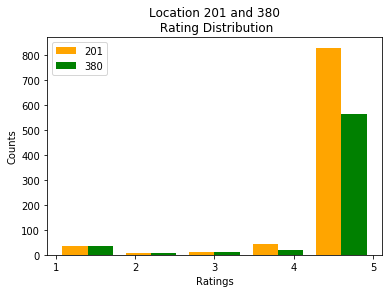

In [47]:
# Generate bar plots to compare the ratings for these two locations
score_201 = df_201["rating"]
score_380 = df_380["rating"]
legend = ["201", "380"]
plt.hist([score_201, score_380], color=["orange", "green"], bins = 5)
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.legend(legend)
plt.xticks(range(1, 6))
plt.title("Location 201 and 380\n Rating Distribution")
plt.show()

In [48]:
list_201 = (df_201["rating"].value_counts(normalize=True) * 100).sort_index()
list_380 = (df_380["rating"].value_counts(normalize=True) * 100).sort_index()
pd.DataFrame({"201": list_201, "380": list_380}).reset_index().rename(index = str, columns = {"index": "Rating"})

,Rating,201,380
0,1.0,3.887689,5.790297
1,2.0,0.755940,1.095462
2,3.0,1.187905,1.721440
3,4.0,4.751620,3.129890
4,5.0,89.416847,88.262911


The table above shows the precentage of each category for each location. <br>
We can see location 201 has more 4 and 5 stars and less 1 and 2 and 3 stars than 380.<br>
From this perspective, conclusion could be __location 201 has better service than 380__.

### Compare reviews for location 381 and 915.

In [49]:
df_381 = df.loc[df["location_id"].isin(["4962_381"])]
print "Num of rows for 381: " + str(df_381.shape[0])
print "Num of missing value for 381 rating: " + str(df_381["rating"].isnull().sum())
df_915 = df.loc[df["location_id"].isin(["4962_915"])]
print "Num of rows for 915: " + str(df_915.shape[0])
print "Num of missing value for 915 rating: " + str(df_915["rating"].isnull().sum())

Num of rows for 381: 559
Num of missing value for 381 rating: 0
Num of rows for 915: 521
Num of missing value for 915 rating: 0


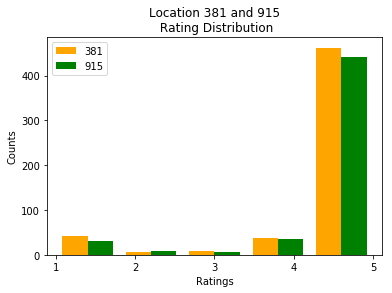

In [50]:
score_381 = df_381["rating"]
score_915 = df_915["rating"]
legend = ["381", "915"]
plt.hist([score_381, score_915], color=["orange", "green"], bins = 5)
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.legend(legend)
plt.xticks(range(1, 6))
plt.title("Location 381 and 915\n Rating Distribution")
plt.show()

In [51]:
list_381 = (df_381["rating"].value_counts(normalize=True) * 100).sort_index()
list_915 = (df_915["rating"].value_counts(normalize=True) * 100).sort_index()
pd.DataFrame({"381": list_381, "915": list_915}).reset_index().rename(index = str, columns = {"index": "Rating"})

,Rating,381,915
0,1.0,7.692308,5.758157
1,2.0,1.252236,1.535509
2,3.0,1.610018,1.343570
3,4.0,6.797853,6.717850
4,5.0,82.647585,84.644914


#### Same idea as previous comparsion
The table above shows the precentage of each category for each location. <br>
We can see location 915 has more 4 and 5 stars and less 1 and 2 and 3 stars than 381.<br>
From this perspective, conclusion could be __location 915 has better service than 381__.

# Part 3: Create a Formula to Rank All Locations

### 3.1 Deal with missing value

In [52]:
df_na = df[df["rating"].isnull()]
df_na["location_id"].value_counts()

4962_221    51
4962_147    15
4962_185     3
Name: location_id, dtype: int64

In [53]:
loc_na = ['4962_221', '4962_147', '4962_185']
for i in loc_na:
    print sum(df["location_id"] == i)

171
77
15


In [54]:
# Build a DataFrame to show number of NA and total number of records for the locations which has NA
na = pd.DataFrame({"loc": [221, 147, 185], "na": [51, 15, 3], "totl": [171, 77, 15]})
na

,loc,na,totl
0,221,51,171
1,147,15,77
2,185,3,15


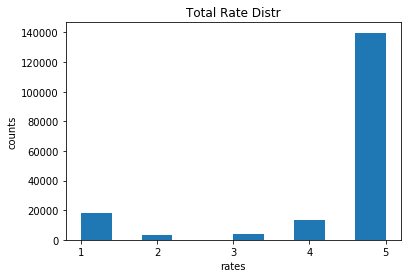

In [55]:
# Histogram can not deal with NA
# After remove the NA, draw a distribution for the whole ratings.
plt.hist(df.dropna()["rating"])
plt.xlabel("rates")
plt.ylabel("counts")
plt.xticks(range(1, 6))
plt.title("Total Rate Distr")
plt.show()

In [56]:
df["rating"].describe()

count    179276.000000
mean          4.413959
std           1.273551
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

### The method here to deal with the missing value is just to remove them.  Reasons are
1. The distribution of the whole rating is highly skewed more ratings occur at 5 stars. Based on the distribution a great amount of value would be designate to be 5 by assuming we will use mean or median to replace the missing values.
2. We can check the other info such as review platform and calculate the average of this review platform then fill the NA with this average, such as all the NA for location 211 from FaceBook, we can give the mean value of FaceBook to the NA of 211. However, the skewed data would give value very close to 5 and this is not a good option.
3. The Model for evaluating each location is based on more pushiment for reviews of 1, 2 and 3 stars. The exact method explained below. __(Not just simple average weight)__

### 3.2 Mehods of calculating the review for each location.
1. The formula is                          $$((precentage of 4 &5 ) - (precentage of 1 & 2 & 3) )* 5$$
<br>
2. For this dataset, the domain knowledge can't work as there is no infomation about what service each location provide, restaruants? online purchase providers? or something else. 
3. The reviews have a trend for higher review, which means reviewers too generous to give bad feedbacks. Thus, each negative feedback means they really don't like the services for any reasons. __I will give strong penalty to those reviews__.
4. I decided to tramsform this 5-star rating system to an upvote and downvote rating system. 1, 2, 3 stars are represent downvote and 4, 5 stars designate as upvotes. 
5. There are 2 situations need to be consider to see whether this model reasonable or not.
> 5.1: More precentage of 4 and 5 with less precentage of 1,2 and 3. After apply the above formula, it will have a __higher__ rank. <br>
> 5.2: Less precentage of 4 and 5 with more precentage of 1,2 and 3. After apply the above formula, it will have a  __lower__ rank.
<br>
6. Model evaluate should be conducted after obtaining the results. The examples from las two parts would be used.

In [57]:
# build a list to contain all locations. For these location_ids are not ordered, can't do inplace, more time spend if sort.
# ls for holding all unique location
ls = []
for i in xrange(len(df)):
    if df.loc[i][0] in ls:
        continue
    else:
        ls.append(df.loc[i][0])

In [58]:
# Based on previous model, make summary of review for each location
ls_rnk = []
for i in xrange(len(ls)):
    loc_id = df.loc[df["location_id"].isin([ls[i]])]
    rts = loc_id["rating"].value_counts(normalize = True, dropna = True)
    tmp = pd.Series([0, 0, 0, 0, 0], index = [1, 2, 3, 4, 5])
    rts = rts.add(tmp, fill_value = 0)  ## In case of wrong reference if any rate not exist for certain location
    rnk = ((rts[4]+rts[5]) - (rts[1]+rts[2]+rts[3]))*5
    ls_rnk.append((ls[i], rnk))
ranks = pd.DataFrame(ls_rnk, columns = ["location_id", "rating"])
ranks.head(10)

,location_id,rating
0,4962_221,3.916667
1,4962_147,3.387097
2,4962_185,4.166667
3,4962_930,4.107505
4,4962_669,3.826135
5,4962_934,0.931990
6,4962_908,4.560284
7,4962_893,2.514061
8,4962_748,2.242921
9,4962_472,3.767396


The above result is final rating for each location. Just see 10 of them.<br>
The whole result is restored as __ranks__ DataFrame

In [59]:
# Export to csv file
ranks.to_csv('location_ranks.csv')

There are total 252 unique locations are rated, stored and exported as 'location_ranks' csv file

### 3.3 Model Validation
1. Evaluate location 201 and 380 with model.
2. Evaluate location 381 and 915 with model.

In [60]:
ranks.loc[ranks["location_id"].isin(["4962_201"])]

,location_id,rating
51,4962_201,4.416847


In [61]:
ranks.loc[ranks["location_id"].isin(["4962_380"])]

,location_id,rating
81,4962_380,4.13928


__This result is consistence with what have found before__

In [62]:
ranks.loc[ranks["location_id"].isin(["4962_381"])]

,location_id,rating
119,4962_381,3.944544


In [63]:
ranks.loc[ranks["location_id"].isin(["4962_915"])]

,location_id,rating
245,4962_915,4.136276


__This result is consistence with what have found before__

### 3.4 Further analysis

#### More Datasets
1. User description such as Age, Gender, Occupation, Education, etc.
2. User review attitude, more generous or not.
3. User review descriptions. Use NLP methods.
4. location description such as how long this service served, users' average waiting time, how long the shippment time, etc.
5. More data will give more information but come with noises. 
6. The budget also counts if want to collect more data and more detailed discovery. 

# Part 4: Build Predictive Model

### 4.1 Take a look at test_review file
1. The test_review file is used for make prediction on ratings for each observations.
2. We need to look at it to make sure all the feature are consistent with training data.

In [64]:
test = pd.read_csv("test_reviews.csv")
test.head(5)

,location_id,review_id,source,date,rating
0,4962_147,test_10368849285,FACEBOOK,12/4/15,NaN
1,4962_147,test_1042394214,FACEBOOK,11/29/16,NaN
2,4962_185,test_11322162891,GOOGLE_PLACES,8/3/16,NaN
3,4962_185,test_11324660949,GOOGLE_PLACES,2/3/18,NaN
4,4962_185,test_11348252095,GOOGLE_PLACES,2/12/16,NaN


In [65]:
# Find all the locations for the test_review file
location_id = []
for i in xrange(len(test)):
    place = test.loc[i][0]
    if place not in location_id:
        location_id.append(place)
location_id

['4962_147', '4962_185', '4962_221', '4962_442', nan]

In [66]:
location_id.pop()
location_id

['4962_147', '4962_185', '4962_221', '4962_442']

In [67]:
# Remove rows with NA and Remove rating columns for later prediction
test = test.drop(["rating"], axis = 1).dropna(axis = 0, how = 'any')
test.head()

,location_id,review_id,source,date
0,4962_147,test_10368849285,FACEBOOK,12/4/15
1,4962_147,test_1042394214,FACEBOOK,11/29/16
2,4962_185,test_11322162891,GOOGLE_PLACES,8/3/16
3,4962_185,test_11324660949,GOOGLE_PLACES,2/3/18
4,4962_185,test_11348252095,GOOGLE_PLACES,2/12/16


There are 4 locations need to be evaluated for each reviewer. Null rows are removed.<br>

### 4.2: Data Preprocessing and Feature Engineering

1. Extract the four locations in training dataset. 
2. Build features for test and train datasets and make sure all the features are consistency for these two datasets
3. Location and Source are categorical values need to be encoded.
4. Date data can be separated to month and year, there may be some seasonal patterns combine with each location significantly affect the rating.
5. Do not need to do Scaling because all independent variables are between 0 and 1 after encoding.

In [68]:
# Create training data set
train = df.loc[df["location_id"].isin(location_id)].drop(["review_id"], axis = 1).reset_index().drop(["index"], axis = 1)

In [69]:
train = train.dropna()
train.head(5)

,location_id,source,date,rating
0,4962_221,GOOGLE_PLACES,10/20/15,1.0
1,4962_221,FACEBOOK,11/27/17,1.0
2,4962_221,FACEBOOK,11/15/17,1.0
3,4962_221,FACEBOOK,7/17/17,1.0
4,4962_221,FACEBOOK,1/11/16,1.0


In [70]:
# Feature Engineering to build new features which is date related.
mon = []
year = []
for i in xrange(len(train)):
    mon.append(str(train.loc[i][2]).split("/")[0])
    year.append(str(train.loc[i][2]).split("/")[2])
train["mon"] = mon
train["year"] = year
train = train.drop(["date"], axis = 1)

In [71]:
train.head()

,location_id,source,rating,mon,year
0,4962_221,GOOGLE_PLACES,1.0,10,15
1,4962_221,FACEBOOK,1.0,11,17
2,4962_221,FACEBOOK,1.0,11,17
3,4962_221,FACEBOOK,1.0,7,17
4,4962_221,FACEBOOK,1.0,1,16


In [72]:
# Find X and Y before fit models
trainY = train["rating"]
trainX = train.drop(["rating"], axis = 1)

In [73]:
# Encod the source column to get dummy variables, or we could say transfor the categorical value to numerical ones.
trainX = pd.get_dummies(trainX)
print trainX.shape

(964, 24)


In [74]:
# Before train model, we need to split the data to train and test ones. test data for evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

In [75]:
X_train.head()

,location_id_4962_147,location_id_4962_185,location_id_4962_221,location_id_4962_442,source_CARS,source_FACEBOOK,source_GOOGLE_PLACES,mon_1,mon_10,mon_11,mon_12,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9,year_14,year_15,year_16,year_17,year_18
192,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
305,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
734,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
706,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
551,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


1. There are total 24 features are in training data set. 
2. Based on the amount of data, I choose 8:2 as train vs test to be splite.
3. All features are 0, 1 binary values as all new built features such as month and year are regarded as categorical feature.
4. __NOT Numerical__ for month and year, because I don't think the _order_ of numerical value play a crucial role. If the order introduced, this would be noise.

### 4.3: Fit Regression Models and Find HyperParameters with Cross Validation

## The problem is a regression not classification
#### R2 is used for evaluation rather than recall, precision, accuracy for classification

### 4.3.1: linear Regression

In [76]:
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
regr.fit(X_train, y_train)
print(regr.intercept_)
print(regr.coef_)

5.33798145602e+14
[ -1.53383605e+14  -1.53383605e+14  -1.53383605e+14  -1.53383605e+14
  -1.96267941e+14  -1.96267941e+14  -1.96267941e+14  -2.52863477e+13
  -2.52863477e+13  -2.52863477e+13  -2.52863477e+13  -2.52863477e+13
  -2.52863477e+13  -2.52863477e+13  -2.52863477e+13  -2.52863477e+13
  -2.52863477e+13  -2.52863477e+13  -2.52863477e+13  -1.58860252e+14
  -1.58860252e+14  -1.58860252e+14  -1.58860252e+14  -1.58860252e+14]


In [77]:
y_pred_te = regr.predict(X_test)
r2_score(y_test, y_pred_te)

0.049601632447576094

### 4.3.2: Random Forest with Cross Validation

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
max_depth=[2,3,4]
ntrees = [36,48, 60]
max_features = [0.1, 0.2, 0.3]
parameters = {"max_depth":max_depth, "n_estimators":ntrees,"max_features":max_features}
model =  RandomForestRegressor(max_depth=10, n_estimators=20, max_features="sqrt")
rfr = GridSearchCV(model, parameters, cv = 5)
rfr.fit(X_train, y_train.reshape(-1, 1))
score = rfr.score(X_test, y_test)
print("Accuracy:{},Best parameters:{}, feature importance:{}".format(score,rfr.best_params_,rfr.best_estimator_.feature_importances_))

Accuracy:0.0591559899289,Best parameters:{'max_features': 0.3, 'n_estimators': 48, 'max_depth': 4}, feature importance:[ 0.06834704  0.00366367  0.0360723   0.06379099  0.06172039  0.06415649
  0.10734318  0.01920331  0.04522741  0.08010927  0.03255731  0.01865211
  0.01094082  0.00943709  0.02140573  0.03704197  0.02664646  0.01866868
  0.04367667  0.04277025  0.06444648  0.0173841   0.05858994  0.04814836]


### 4.3.3: KNN with Cross Validation

In [79]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {"n_neighbors":[5,10,15]}
model =  KNeighborsRegressor()
knnr = GridSearchCV(model, parameters, cv = 5, verbose=1)
knnr.fit(X_train, y_train)
score = knnr.score(X_test, y_test)
print("Accuracy:{},Best parameters:{}".format(score,knnr.best_params_,))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Accuracy:0.00663603699122,Best parameters:{'n_neighbors': 10}


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


### 4.3.4: Ridge Regression with Cross Validation

In [80]:
from sklearn.linear_model import Ridge
parameters={"alpha": [30, 28, 25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
model = Ridge()
rr = GridSearchCV(model, parameters, cv = 5)
rr.fit(X_train, y_train)
score = rr.score(X_test, y_test)
print("Accuracy:{},Best parameters:{}".format(score,rr.best_params_,))

Accuracy:0.0445764786915,Best parameters:{'alpha': 30}


### 4.4: Feature Important from Random Forest

In [88]:
importances = rfr.best_estimator_.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), trainX.columns), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
source_GOOGLE_PLACES: 0.1073
mon_11: 0.0801
location_id_4962_147: 0.0683
year_15: 0.0644
source_FACEBOOK: 0.0642
location_id_4962_442: 0.0638
source_CARS: 0.0617
year_17: 0.0586
year_18: 0.0481
mon_10: 0.0452
mon_9: 0.0437
year_14: 0.0428
mon_6: 0.037
location_id_4962_221: 0.0361
mon_12: 0.0326
mon_7: 0.0266
mon_5: 0.0214
mon_1: 0.0192
mon_8: 0.0187
mon_2: 0.0187
year_16: 0.0174
mon_3: 0.0109
mon_4: 0.0094
location_id_4962_185: 0.0037


### 4.5: Conclusion for Model Selection

1. First of all, this is a regression model, thus, linear regression, knn, randomforest regressor and ridge regression are selected.
2. The __evalution__ is r2_score as the default of GridSearchCV and Random Forest has the best value with selected hyperparameters.
3. Random Forest is a stable model can discovery nonlinearity compared with linear regression. __"Random"__ is the best description of it, which have a steady property and not consume too much time to calculate. Apparently, it is my final model. But in this case, The independent variables are too limited to use them as important features. Normally, Random Forest has the most stable predictions, but when you run multiple times for this dataset, the result various.
4. Acutally, none of the model is stable. Linear Regression can't grab the nonlinearity property in data, KNN performs bad, Ridge Regression with Penality is OK and stable but not great since Random Forest can give better evaluations.

### 4.6: Fill Test Review Table

In [92]:
# Make features consistent with the training data set
test_review = test.reset_index()
te_mon = []
te_year = []
for i in xrange(len(test)):
    te_mon.append(str(test_review.loc[i][4]).split("/")[0])
    te_year.append(str(test_review.loc[i][4]).split("/")[2])
test_review["mon"] = te_mon
test_review["year"] = te_year
test_review = test_review.drop(["date", "index", "review_id", "rating"], axis = 1)
test_review.head()

,location_id,source,mon,year
0,4962_147,FACEBOOK,12,15
1,4962_147,FACEBOOK,11,16
2,4962_185,GOOGLE_PLACES,8,16
3,4962_185,GOOGLE_PLACES,2,18
4,4962_185,GOOGLE_PLACES,2,16


In [93]:
test_review = pd.get_dummies(test_review)
test_rf_predict = rfr.predict(test_review)
test_rf_predict

array([ 3.98711662,  3.69562019,  4.44837984, ...,  3.89902805,
        3.77026317,  3.71239521])

In [94]:
test["rating"] = test_rf_predict

In [95]:
test.head()

,location_id,review_id,source,date,rating
0,4962_147,test_10368849285,FACEBOOK,12/4/15,3.987117
1,4962_147,test_1042394214,FACEBOOK,11/29/16,3.695620
2,4962_185,test_11322162891,GOOGLE_PLACES,8/3/16,4.448380
3,4962_185,test_11324660949,GOOGLE_PLACES,2/3/18,4.521121
4,4962_185,test_11348252095,GOOGLE_PLACES,2/12/16,4.480297


#### The result looks good